# SIN Stock Trading Game

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter

# Importing defined functions

from Functions import stock_df_create
from Functions import get_current_weights
from Functions import rebalance_portfolio

## 1 - Dataframe creation and stock selection

In [2]:
tkr_list = ['BTI', 'BYD', 'MO', 'SAM', 'STZ', 'LMT', 'LVS',
            'TAP', 'TDG', 'PEP', 'NOC', 'MGM', 'GD', 'BUD', 
            'BAESY', 'BDRBF', 'MNST', 'WYNN', 'RRR', 'RTX',
            'PM', 'CZR', 'HO.PA', 'RHM.DE', 'AIR', 'HEI', 'GTBIF',
            'CURLF', 'DKNG']

In [3]:
df = stock_df_create(tkr_list, start_date="2024-02-19", end_date="2024-03-19")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## 2 - Stock Weighting and Portfolio Construnction

### 2.1 Assigning Size and Momentum scores

In [4]:
scaler = MinMaxScaler()

market_cap_values = df['MKT_CAP'].values.reshape(-1, 1)
weekly_return_values = df['W_RET'].values.reshape(-1, 1)
monthly_return_values = df['M_RET'].values.reshape(-1,1)

df['Size_Score'] = scaler.fit_transform(market_cap_values)
df['W_Mom_Score'] = scaler.fit_transform(weekly_return_values)
df['M_Mom_Score'] = scaler.fit_transform(monthly_return_values)

### 2.2 Defining Scores Importance

In [5]:
mkt_cap_weight = 0.3
w_mom_weight = 0.3
m_mom_weight = 0.4

In [6]:
df['Overall_Score'] = (df['Size_Score'] * mkt_cap_weight) + (df['W_Mom_Score'] * w_mom_weight) + (df['M_Mom_Score'] * m_mom_weight)
df.sort_values(by="TKR")

,TKR,LAST_PRRICE,MKT_CAP,W_RET,M_RET,LAST_PRICE,Size_Score,W_Mom_Score,M_Mom_Score,Overall_Score
24,AIR,,2129877248,-0.008038,-0.055097,62.939999,0.000000,0.142000,0.317862,0.169745
14,BAESY,,52800655360,0.031259,0.056719,67.629997,0.216265,0.238805,0.641405,0.393083
15,BDRBF,,4305128448,0.072839,0.085084,41.830002,0.009284,0.341233,0.723482,0.394548
0,BTI,,67573772288,0.034288,0.025413,31.070000,0.279317,0.246265,0.550819,0.378002
13,BUD,,118171164672,-0.048027,-0.044391,60.060001,0.495269,0.043491,0.348839,0.301163
1,BYD,,6067680256,-0.019722,-0.002088,62.130001,0.016807,0.113216,0.471245,0.227505
27,CURLF,,3946057984,0.340260,0.032000,5.160000,0.007752,1.000000,0.569880,0.530277
21,CZR,,8935353344,-0.065681,-0.043697,39.830002,0.029046,0.000000,0.350846,0.149052
28,DKNG,,21793136640,0.045651,0.053243,43.520000,0.083924,0.274258,0.631348,0.359993
12,GD,,77032218624,0.015845,0.032239,277.600006,0.319686,0.200834,0.570571,0.384385


### 2.3 Portfolio Construction

In [7]:
df['Weights_new'] = df['Overall_Score'] / df['Overall_Score'].sum()

New_weights = df[['TKR', 'Weights_new', 'LAST_PRICE']]
New_weights.sort_values(by="TKR")

,TKR,Weights_new,LAST_PRICE
24,AIR,0.016626,62.939999
14,BAESY,0.038501,67.629997
15,BDRBF,0.038644,41.830002
0,BTI,0.037024,31.070000
13,BUD,0.029498,60.060001
1,BYD,0.022283,62.130001
27,CURLF,0.051939,5.160000
21,CZR,0.014599,39.830002
28,DKNG,0.035260,43.520000
12,GD,0.037649,277.600006


### 2.4 Visual Representation

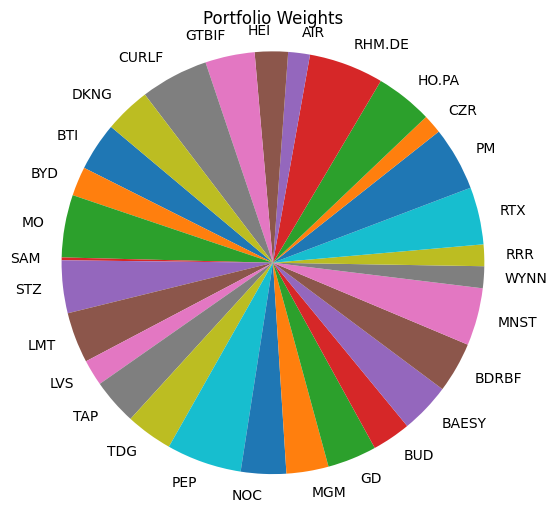

In [8]:
plt.figure(figsize=(6, 6))
plt.pie(New_weights['Weights_new'], labels=New_weights['TKR'], startangle=140)
plt.title('Portfolio Weights')
plt.axis('equal') 

plt.show()

## 3 - Portfolio Rebalancing

In [9]:
Cur_port = pd.read_csv("OpenPosition_3_23_2024.csv", header=0)
Cur_port

,Symbol,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage
0,AIR,European Aeronautic Defence and Space NV,400,EUR,169.900,166.180,0.60,"1,488.00",67960.000000,2.24
1,BAESY,BAE Systems plc - ADR,590,USD,69.810,68.518,0.29,705.32,38110.126207,1.89
2,BDRBF,Bombardier Inc. - Ordinary Shares - Class B (S...,1000,USD,43.880,42.040,0.29,"1,702.51",40601.058514,4.38
3,BTI,British American Tobacco Plc - ADR,937,USD,29.990,31.070,-0.16,-936.34,26000.804989,-3.48
4,BUD,Anheuser-Busch In Bev SA/NV - ADR,300,USD,59.500,59.930,0.21,-119.36,16516.155298,-0.72
5,BYD,Boyd Gaming Corp.,350,USD,63.170,62.540,-0.53,204.02,20457.363337,1.01
6,CURLF,Curaleaf Holdings Inc,9060,USD,5.315,5.140,-0.04,"1,467.02",44555.590510,3.40
7,CZR,Caesars Entertainment Inc,390,USD,41.310,39.670,-0.32,591.81,14907.009882,4.13
8,DKNG,DraftKings Inc - Ordinary Shares - Class A,850,USD,47.200,42.780,-0.75,"3,476.26",37122.025241,10.33
9,GD,General Dynamics Corp.,150,USD,281.160,278.070,-0.18,428.86,39022.539694,1.11


In [10]:
Cur_weights = get_current_weights(Cur_port)
Cur_weights = pd.DataFrame(Cur_weights.items(), columns=['TKR', 'Weights_cur'])
Cur_weights

,TKR,Weights_cur
0,AIR,0.065752
1,BAESY,0.039850
2,BDRBF,0.042454
3,BTI,0.027188
4,BUD,0.017270
5,BYD,0.021391
6,CURLF,0.046589
7,CZR,0.015587
8,DKNG,0.038817
9,GD,0.040804


In [11]:
trades, num_trades, traded_amount = rebalance_portfolio(Cur_weights, New_weights, Cur_port)

In [12]:
trades

,TKR,Weights_cur,Weights_new,LAST_PRICE,Symbol,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage,DollarAmount,DollarAmount_cur,DollarAmount_new,DollarAmount_diff,Shares_to_trade
0,AIR,0.065752,0.016626,62.939999,AIR,European Aeronautic Defence and Space NV,400,EUR,169.90,166.18,0.60,"1,488.00",67960.000000,2.24,67960.00,67960.00,15734.474067,-52225.525933,-307.0
4,BUD,0.017270,0.029498,60.060001,BUD,Anheuser-Busch In Bev SA/NV - ADR,300,USD,59.50,59.93,0.21,-119.36,16516.155298,-0.72,17850.00,17850.00,27916.329822,10066.329822,169.0
17,NOC,0.045352,0.034619,462.390015,NOC,Northrop Grumman Corp.,100,USD,468.75,464.19,1.26,421.93,43372.256560,0.98,46875.00,46875.00,32763.419423,-14111.580577,-30.0
18,PEP,0.041275,0.057461,171.259995,PEP,PepsiCo Inc,248,USD,172.02,173.00,-0.43,-224.88,39473.111514,-0.57,42660.96,42660.96,54380.619376,11719.659376,68.0
19,PM,0.031566,0.048782,95.330002,PM,Philip Morris International Inc,359,USD,90.88,95.61,-1.32,"-1,571.18",30187.941819,-4.95,32625.92,32625.92,46166.516294,13540.596294,149.0
24,TAP,0.042236,0.035173,67.449997,TAP,Molson Coors Beverage Company - Ordinary Share...,650,USD,67.16,67.72,0.09,-336.80,40391.946408,-0.83,43654.00,43654.00,33287.469744,-10366.530256,-154.0
25,TDG,0.045266,0.035762,1181.000000,TDG,Transdigm Group Incorporated,38,USD,1231.20,1202.00,-1.18,"1,026.68",43289.536992,2.43,46785.60,46785.60,33845.017078,-12940.582922,-11.0


In [13]:
num_trades

7

In [14]:
traded_amount

-54317.63419514561

## 4 - Performance Evaluation

[*********************100%%**********************]  1 of 1 completed


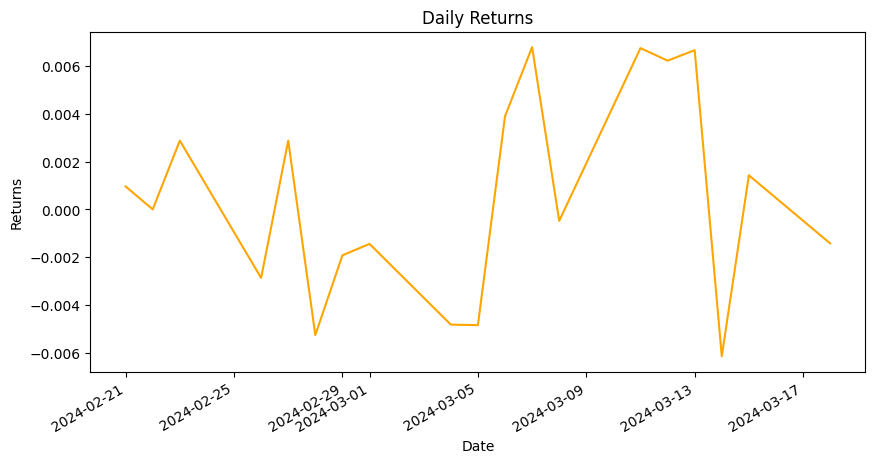

In [16]:
Benchmark = yf.download("VICEX", start="2024-02-19", end="2024-03-19") 
Benchmark['RET'] = Benchmark['Adj Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(Benchmark.index, Benchmark['RET'], color='orange', linestyle='-')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')

date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()  # Rotate x-axis labels

plt.show()